### Task 1: Help the marketing team gain a better understanding of business performance. ###

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

from util.plots import plot_adr_hist, plot_room_rates, plot_reservations_roomtype, plot_reservations_country, plot_cancellations_roomtype

In [84]:
# loading the raw dataset
df = pd.read_csv('data/hotels.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


First, check the rate of canceled reservations:

In [85]:
print('{} % of reservations are canceled'.format((df['is_canceled'].sum() / len(df) * 100).round(2)))

37.04 % of reservations are canceled


37.04% is high enough where no additional techniques have to be used in the future (during predictive modeling) to equalize the 2 classes; most models used for binary classification can handle this amount of disparity. 
<br> Next the number of missing values are explored:

In [86]:
df.isna().sum().sort_values(ascending=False).head(10)

company                   112593
agent                      16340
country                      488
children                       4
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
hotel                          0
previous_cancellations         0
dtype: int64

We can see that the data quality in most of the columns is exceptionally good, there are only a few cases that need to be handled for the other 2 tasks (predictive modeling):
- for the *company* column, almost all entries are missing, this is dropped entirely.
- for the *agent* column, about 13% of entries are missing. This can be substituted (for example, for the most commonly appearing agent ID), but since the value is categorical with a large number of categories, substitution might distort data more than dropping the column entirely, but this is a close call. For simplicity, I decided to drop this column also.
- For the *country* column, the argument is similar, but with a lot less missing entries. For this reason I ended up only dropping the rows  where the entries are missing from the country column. The same logic goes to the *children* column.

In [87]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

The data set only contains 2 hotels, so I conducted further analysis on the differences between these hotels. I'm interested in the differences in revenue, room types, and guests in general that visit both of these hotels.

In [88]:
df_h1 = df.loc[df['hotel'] == 'City Hotel']
df_h2 = df.loc[df['hotel'] == 'Resort Hotel']

In [89]:
print('Average Daily rate: ', df['adr'].mean())
print('Average Daily rate for City Hotel: ', df_h1['adr'].mean())
print('Average Daily rate for Resort Hotel: ', df_h2['adr'].mean())

Average Daily rate:  101.83112153446453
Average Daily rate for City Hotel:  105.3044653977023
Average Daily rate for Resort Hotel:  94.95292960559225


First I drew histograms for both hotels' revenues, and for the two hotels separately as well:

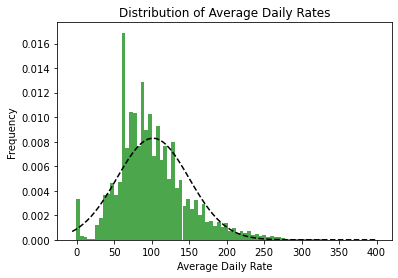

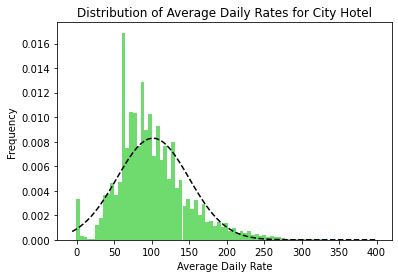

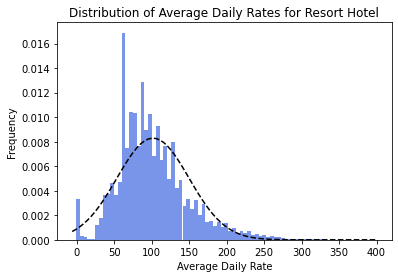

In [90]:
plot_adr_hist(df, color='green')
plt.title('Distribution of Average Daily Rates')
plt.show()
plot_adr_hist(df, color='limegreen')
plt.title('Distribution of Average Daily Rates for City Hotel')
plt.show()
plot_adr_hist(df, color='royalblue')
plt.title('Distribution of Average Daily Rates for Resort Hotel')
plt.show()

As we can see the revenue from City Hotel's rooms roughly follows a normal distribution. For Resort Hotel, there is also a similarity to the bell curve, but less so.
<br> Next, I checked the mean and std. deviation of daily rates, and reservation counts for different room types for both hotels:

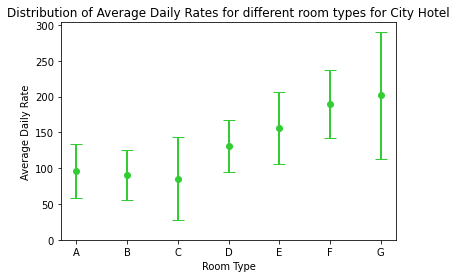

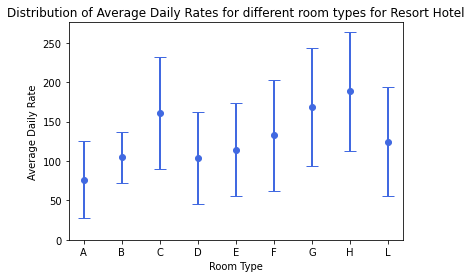

In [91]:
fig, ax = plot_room_rates(df=df_h1,color='limegreen')
plt.title('Distribution of Average Daily Rates for different room types for City Hotel')
plt.show()
fig, ax = plot_room_rates(df=df_h2,color='royalblue')
plt.title('Distribution of Average Daily Rates for different room types for Resort Hotel')
plt.show()

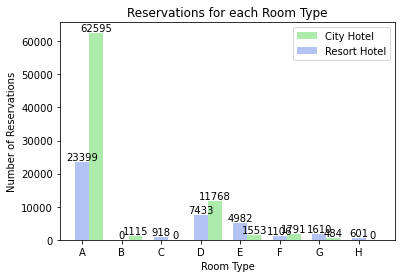

In [92]:
plot_reservations_roomtype(df_h1,df_h2)

We can see that Room type A has the lowest daily rate on average, and also has the most reservations. Room type D is the second least expensive, with the second most reservations. The majority guests reserve these two types of rooms.

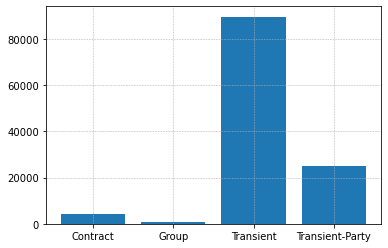

In [93]:
y = df.groupby('customer_type').size()
x = y.index
plt.bar(x,y)
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

I'm also curious where guests that visit the two hotels come from:

c:\Users\Kovács Levente\Documents\Projects\hotels_case_study\util\plots.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(x,rotation=90)
c:\Users\Kovács Levente\Documents\Projects\hotels_case_study\util\plots.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(x,rotation=90)


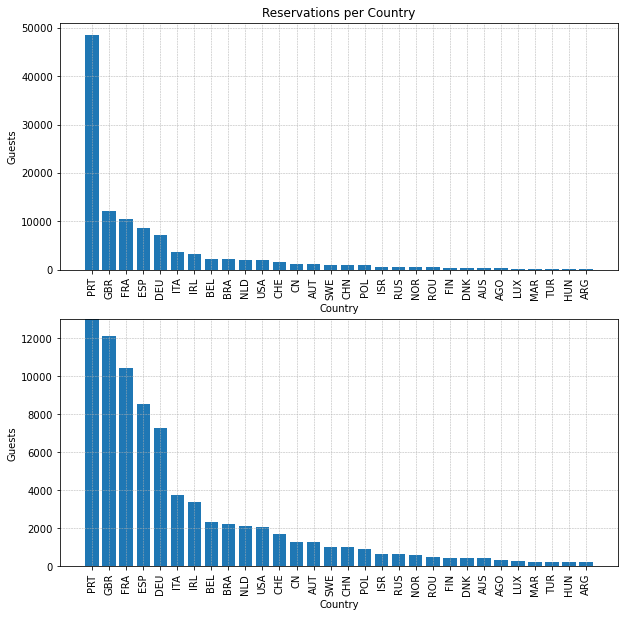

In [94]:
fig, ax = plot_reservations_country(df)
plt.show()

In [95]:
test = df['reservation_status'] + df['is_canceled'].astype(str)
test.value_counts()

# exact correlation between 'reservation_status' and 'is_canceled'

Check-Out0    75166
Canceled1     43017
No-Show1       1207
dtype: int64

Lastly, I check whether some room types are more or less likely to be canceled than others:

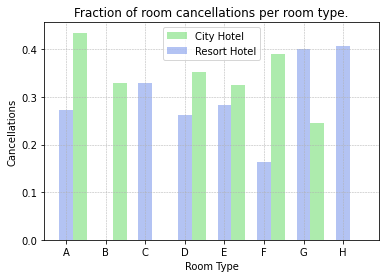

In [96]:
plot_cancellations_roomtype(df_h1,df_h2)